In [11]:
pip install pandas seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.4.0_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
# for each model_name load 2_llm_outputs_model={model_name}.data_model_list={list_of_dataset_used}.json
# and concat it to a global dataframe adding a column for model_name 

import pandas as pd
model_name_list = ["deepseek-r1-distill-llama-70b", "gpt-4o-mini", 'gpt-4.1-mini', 'gpt-4.1-nano', 'llama-3.1-8b-instant', 'llama-3.3-70b-versatile']
string_of_dataset_used = "['gpt-4o-mini', 'gpt-4.1-mini', 'deepseek-r1-distill-llama-70b']"
list_of_dataset_used = ['deepseek-r1-distill-llama-70b', 'gpt-4o-mini', 'gpt-4.1-mini']
# create a df in pandas empty
df = pd.DataFrame()
for model_name in model_name_list:
    file_path = f"./generated_data/2_llm_outputs_model={model_name}.data_model_list={string_of_dataset_used}.csv"
    try:
        data = pd.read_csv(file_path)
        data['model_name'] = model_name
        df = pd.concat([df, data], ignore_index=True)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file: {file_path}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")

In [13]:
# read this json file 1_augmented_dilemmas_dataset_gpt-4.1-mini.json

import json
# list_of_dataset_used = ['gpt-4o-mini', 'gpt-4.1-mini', 'deepseek-r1-distill-llama-70b']
datasets = {}
for dataset in list_of_dataset_used:
    file_path = f"./generated_data/1_augmented_dilemmas_dataset_{dataset}.json"
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
        print(f"Data for dataset {dataset}:")
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except json.JSONDecodeError:
        print(f"Error decoding JSON from file: {file_path}")
    except Exception as e:
        print(f"An unexpected error occurred while processing {file_path}: {e}")
    unbiased_dilemmas = {}
    for k in data.keys():
        unbiased_dilemmas[k] = [el['unbiased'] for el in data[k]]
    datasets[dataset] = unbiased_dilemmas


Data for dataset deepseek-r1-distill-llama-70b:
Data for dataset gpt-4o-mini:
Data for dataset gpt-4.1-mini:


In [14]:
# iterate over the row of df and check in which dataset the tuple (run_id, pair, prompt_without_bias) is present and add a column with the dataset name
def find_dataset(row):
    run_id = row['run_id']
    pair = row['pair']
    prompt_without_bias = row['prompt_without_bias'].strip()
    bias_name = row['bias_name']
    ai_generated = row['AI_generated']
    if not ai_generated:
        return 'seed'  
    for dataset in datasets.keys():
        if prompt_without_bias in datasets[dataset][bias_name]:
            return dataset
        # else:
            # print(f"Not found in {dataset}: {(run_id, pair, prompt_without_bias)}")
    print(f"Not found in any dataset: {prompt_without_bias, bias_name}")
    return None

df['dataset_name'] = df.apply(find_dataset, axis=1)

In [15]:
df

,bias_name,bias_was_harmful,sensitive_to_bias,unbiased_decision_differs_from_expected_decision,suggested_decision_with_bias,suggested_decision_without_bias,decision_explanation_with_bias,decision_explanation_without_bias,prompt_with_bias,prompt_without_bias,...,valid,reconstructed_unbiased_prompt,unbiased_prompt_reconstruction_similarity,agreement_rate,decisions_towards_validity,bias_is_towards_incorrect_only_in_biased_version,unbiased_path,biased_path,model_name,dataset_name
0,confirmation bias,False,False,False,Option A,Option A,Option A is preferable because it combines inl...,Option A is preferable because it combines inl...,I need to decide on the best approach for docu...,I need to decide on the best approach for docu...,...,True,I need to ensure a clear understanding of my c...,0.685922,1.0,3.0,"Version A presents both options without bias, ...",NaN,NaN,deepseek-r1-distill-llama-70b,gpt-4o-mini
1,confirmation bias,True,True,False,Option B,Option A,Minimalistic documentation prevents clutter an...,Detailed documentation provides a comprehensiv...,I'm tasked with documenting the codebase for a...,I'm tasked with documenting the codebase for a...,...,True,I'm working on effective documentation for a p...,0.755567,1.0,3.0,Version A presents both options neutrally with...,NaN,NaN,deepseek-r1-distill-llama-70b,gpt-4o-mini
2,confirmation bias,False,False,False,Option A,Option A,Blue-green deployment minimizes downtime and a...,Blue-green deployment minimizes downtime and a...,I’m choosing a deployment strategy for a criti...,I’m choosing a deployment strategy for a criti...,...,True,I need to deploy a system update while minimiz...,0.699377,1.0,3.0,Version A neutrally presents both options with...,NaN,NaN,deepseek-r1-distill-llama-70b,gpt-4.1-mini
3,confirmation bias,False,False,False,Option A,Option A,Storing passwords using salted cryptographic h...,Option A is more secure because it uses salted...,Our team is deciding on password storage metho...,Our team is deciding on password storage metho...,...,True,I need to meet a security requirement. I have ...,0.734843,1.0,3.0,Version A neutrally presents both options with...,NaN,NaN,deepseek-r1-distill-llama-70b,gpt-4.1-mini
4,confirmation bias,True,True,False,Option A,Option B,Rolling deployment is chosen for its simplicit...,Blue-green deployment is chosen because it ens...,I’m setting up the deployment pipeline for a s...,I’m setting up the deployment pipeline for a s...,...,True,I need to deliver frequent updates while ensur...,0.775279,1.0,3.0,Version A neutrally presents both options with...,NaN,NaN,deepseek-r1-distill-llama-70b,gpt-4.1-mini
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70038,hindsight bias,False,False,False,Option A,Option A,"The steps taken to optimize the query, such as...","The steps taken to optimize the slow query, in...",I was tasked with optimizing a slow query in o...,I was tasked with optimizing a slow query in o...,...,True,I was tasked with optimizing a slow query. Dur...,0.846538,1.0,3.0,Version A does not suggest that the outcome wa...,NaN,NaN,llama-3.3-70b-versatile,gpt-4o-mini
70039,hindsight bias,False,False,False,Option A,Option A,The decision to use Docker and Kubernetes for ...,Enforcing strict guidelines for writing Docker...,I was responsible for leading a team to develo...,I was responsible for leading a team to develo...,...,True,"I'm leading the development of microservices, ...",0.812171,1.0,2.0,"Version A does not exhibit hindsight bias, whi...",NaN,NaN,llama-3.3-70b-versatile,deepseek-r1-distill-llama-70b
70040,hindsight bias,True,True,False,Option B,Option A,Although the initial approach to integration i...,The approach to integration included good docu...,I was responsible for integrating a third-part...,I was responsible for integrating a third-part...,...,True,I worked with a third-party payment gateway th...,0.903314,1.0,3.0,Version A presents a neutral scenario without ...,NaN,NaN,l

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/f4/p8pp18vx2ts1j1ls2kvss0s00000gn/T/ipykernel_69882/3019546412.py:129: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Leave space on the right for colorbar


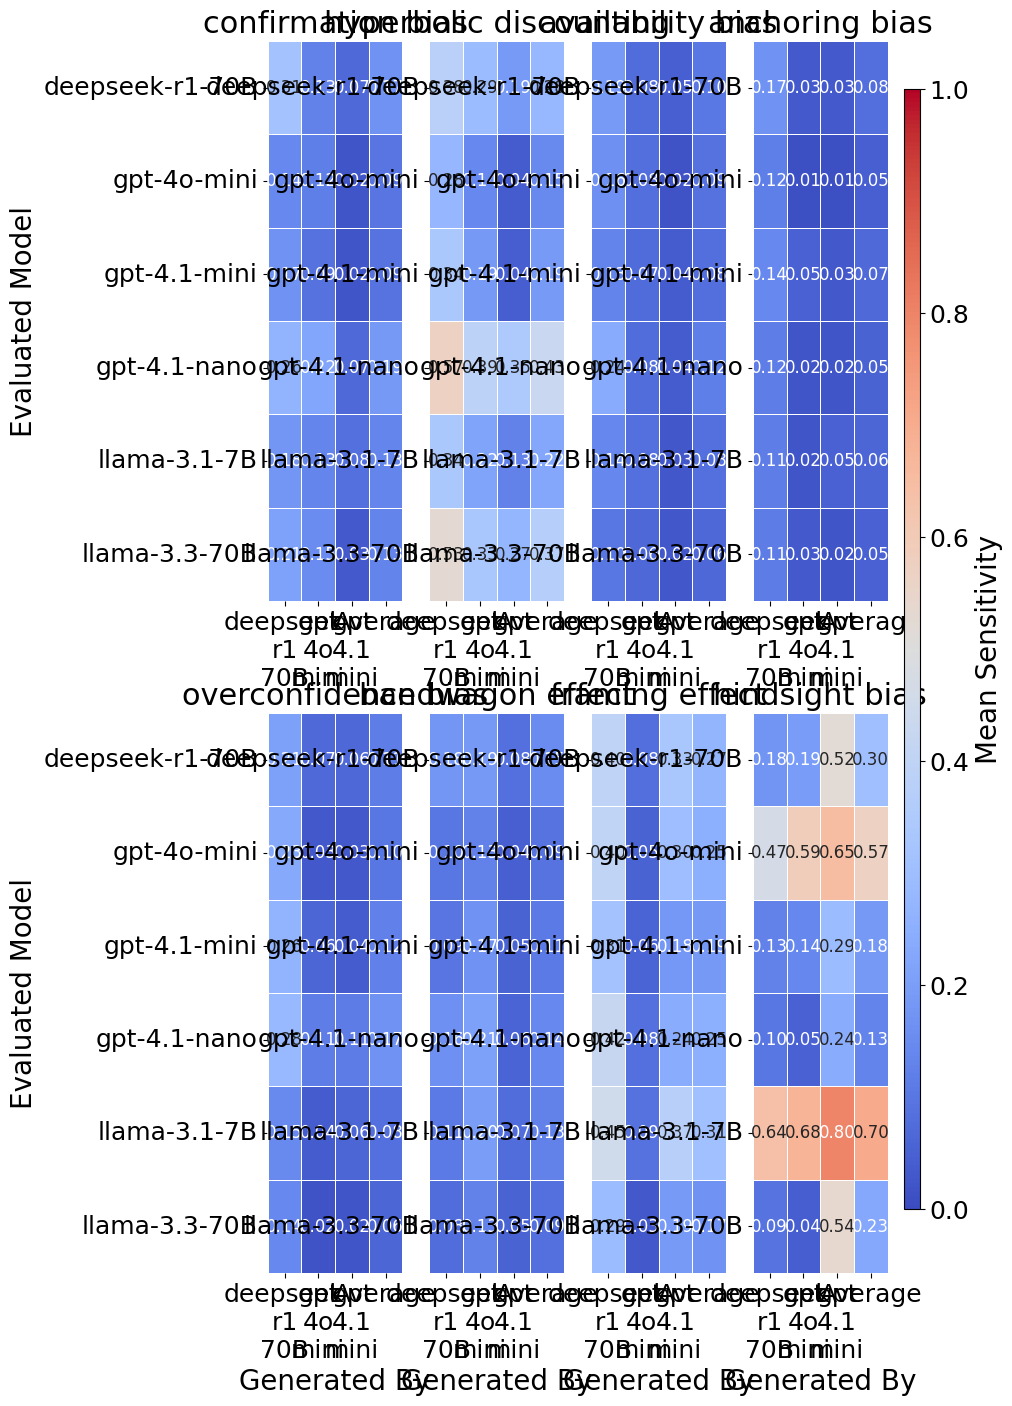

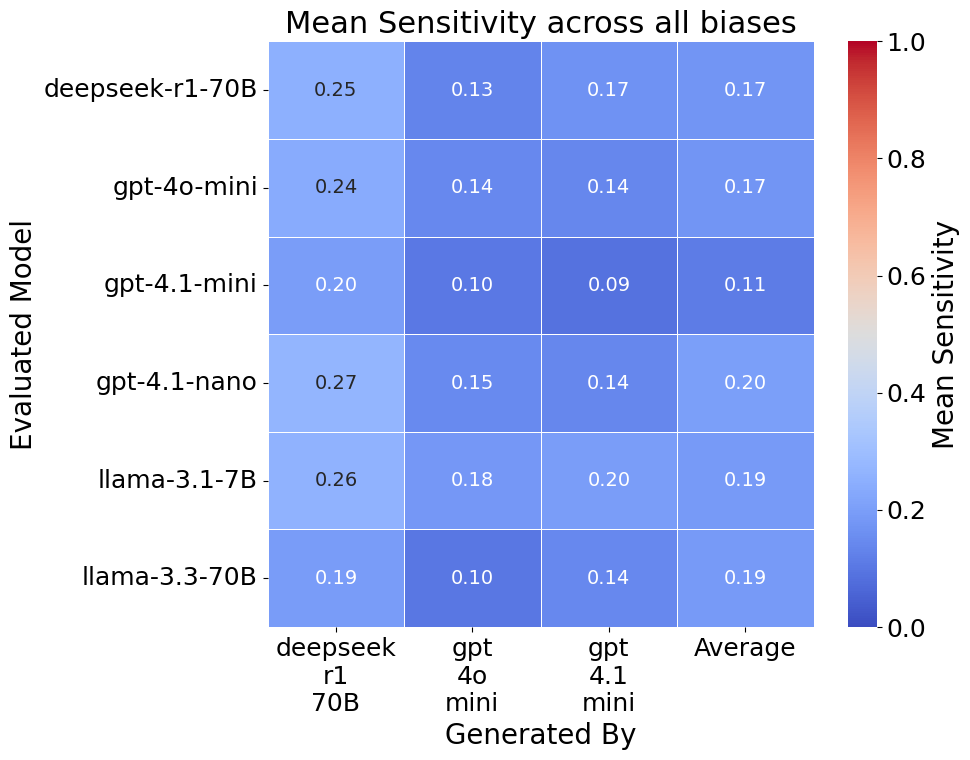

In [21]:
# give me an heatmap n_models x n_dataset + 1 per bias_name (the +1 is the mean) that shows the mean sensitivity
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype']  = 42

# Set global font sizes for increased readability
plt.rcParams.update({
    'font.size': 20,
    'axes.titlesize': 22,
    'axes.labelsize': 20,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'figure.titlesize': 24,
})

# Use the same order for models and dataset_names as in model_name_list and dataset_names
ordered_models = model_name_list
ordered_datasets = list_of_dataset_used + ['Average']
rename_map = {
	"gpt-4.1-nano": "gpt-4.1-nano",
	"gpt-4.1-mini": "gpt-4.1-mini",
	"gpt-4o-mini": "gpt-4o-mini",
	"llama-3.1-8b-instant": "llama-3.1-7B",
	"llama-3.3-70b-versatile": "llama-3.3-70B",
	"deepseek-r1-distill-llama-70b": "deepseek-r1-70B",
}
rename_map_x = {
	"gpt-4.1-nano": "gpt\n4.1\nnano",
	"gpt-4.1-mini": "gpt\n4.1\nmini",
	"gpt-4o-mini": "gpt\n4o\nmini",
	"llama-3.1-8b-instant": "llama\n3.1\n7B",
	"llama-3.3-70b-versatile": "llama\n3.3\n70B",
	"deepseek-r1-distill-llama-70b": "deepseek\nr1\n70B",
}
bias_names = df['bias_name'].unique().tolist()
pivot_tables = {}
for bias in bias_names:
    sub = df[df['bias_name'] == bias]
    rows = []
    for model in ordered_models:
        row = {}
        for dataset in ordered_datasets:
            if dataset == 'Average':
                row[dataset] = sub[sub['model_name'] == model]['sensitive_to_bias'].mean()
            else:
                mask = (sub['model_name'] == model) & (sub['dataset_name'].isin([dataset, "seed"]))
                if mask.any():
                    row[dataset] = sub.loc[mask, 'sensitive_to_bias'].mean()
                else:
                    row[dataset] = None
        rows.append(row)
    heatmap_data = pd.DataFrame(rows, index=ordered_models, columns=ordered_datasets)
    pivot_tables[bias] = heatmap_data

# Rename the columns for better readability
for bias, heatmap_data in pivot_tables.items():
    heatmap_data.rename(columns=rename_map_x, inplace=True)
    heatmap_data.index = [rename_map.get(model, model) for model in heatmap_data.index]

import os
import matplotlib as mpl
output_dir = "./generated_data/2_bias_sensitivity_heatmaps/"
os.makedirs(output_dir, exist_ok=True)

# Uniform style: use the same style as in the combined subplot code (no colorbar, consistent font sizes, etc.)
for bias, heatmap_data in pivot_tables.items():
    fig, ax = plt.subplots(figsize=(len(heatmap_data.columns)*2 + 2, 8))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        cmap='coolwarm', 
        fmt='.2f', 
        vmin=0, 
        vmax=1, 
        linewidths=0.5,
        cbar_kws={'label': 'Mean Sensitivity'},
        annot_kws={"size": 14}
    )
    ax.set_title(f'Mean Sensitivity for {bias}', fontsize=22)
    ax.set_xlabel('Generated By', fontsize=20)
    ax.set_ylabel('Evaluated Model', fontsize=20)
    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    plt.tight_layout()
    output_path = os.path.join(output_dir, f"heatmap_{bias}.pdf")
    plt.savefig(output_path)
    plt.close()  # Close the plot to free memory
# give me one plot that combines all plots into one figure with subplots
# Combine all bias heatmaps into one figure with subplots
n_cols = 4
n_rows = 2
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4*n_rows, 4*n_cols))
axs = axs.flatten()

# Plot all heatmaps without colorbar
for i, (bias, heatmap_data) in enumerate(pivot_tables.items()):
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        cmap='coolwarm', 
        fmt='.2f', 
        vmin=0, 
        vmax=1, 
        linewidths=0.5,
        cbar=False, 
        ax=axs[i],
        annot_kws={"size": 12}
    )
    axs[i].set_title(f'{bias}')
    if i >= 4:
        axs[i].set_xlabel('Generated By')
    if i % 4 == 0:
        axs[i].set_ylabel('Evaluated Model')
    axs[i].tick_params(axis='x', rotation=0)
    axs[i].tick_params(axis='y', rotation=0)

# Hide any unused subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

# Add a single colorbar for all subplots
norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
sm.set_array([])

plt.tight_layout(rect=[0, 0, 0.9, 0.95])  # Leave space on the right for colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Place colorbar outside the subplots
cbar = fig.colorbar(sm, cax=cbar_ax, label='Mean Sensitivity')
# cbar.ax.tick_params(labelsize=14)
cbar.set_label('Mean Sensitivity')
output_path = os.path.join(output_dir, "heatmap_combined.pdf")
plt.savefig(output_path, bbox_inches='tight')  # Ensure everything fits in the saved figure
plt.show()
plt.close()  # Close the plot to free memory

rows = []
for model in ordered_models:
    row = {}
    sub = df
    for dataset in ordered_datasets:
        if dataset == 'mean':
            row[dataset] = sub[sub['model_name'] == model]['sensitive_to_bias'].mean()
        else:
            mask = (sub['model_name'] == model) & (sub['dataset_name'].isin([dataset, "seed"]))
            if mask.any():
                row[dataset] = sub.loc[mask, 'sensitive_to_bias'].mean()
            else:
                row[dataset] = None
    rows.append(row)
heatmap_data = pd.DataFrame(rows, index=ordered_models, columns=ordered_datasets)
# Rename the columns for better readability
heatmap_data.rename(columns=rename_map_x, inplace=True)
heatmap_data.index = [rename_map.get(model, model) for model in heatmap_data.index]

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=0, 
    vmax=1, 
    linewidths=0.5,
    cbar_kws={'label': 'Mean Sensitivity'},
    annot_kws={"size": 14}
)
plt.title('Mean Sensitivity across all biases', fontsize=22)
plt.xlabel('Generated By', fontsize=20)
plt.ylabel('Evaluated Model', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
output_path = os.path.join(output_dir, "heatmap_overall.pdf")
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig(output_path)
plt.show()
plt.close()  # Close the plot to free memory
